In [1]:
!pip install opendatasets

# Load

In [2]:
import opendatasets as od
import os

In [4]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [6]:
od.download('https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: huseinabdulh
Your Kaggle Key: ········


  0%|                                                                                       | 0.00/330M [00:00<?, ?B/s]

100%|████████████████████████████████████████████████████████████████████████████████| 330M/330M [05:46<00:00, 999kB/s]


In [7]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

C:\Users\ASUS RYZEN\AnacondaJupyter\Masker


In [8]:
ls

 Volume in drive C is OS
 Volume Serial Number is 70B6-E30C

 Directory of C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

12/06/2021  10:56 AM    <DIR>          .
12/06/2021  10:56 AM    <DIR>          ..
12/06/2021  10:50 AM    <DIR>          .ipynb_checkpoints
12/06/2021  10:56 AM    <DIR>          face-mask-12k-images-dataset
12/06/2021  10:56 AM           918,660 Penugasan_4.ipynb
               1 File(s)        918,660 bytes
               4 Dir(s)  341,401,427,968 bytes free


# Load and Split Data

In [7]:
'''import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Masker'
class_dir = ['mask_weared_incorrect', 'with_mask', 'without_mask' ]
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir,item))'''

In [9]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

C:\Users\ASUS RYZEN\AnacondaJupyter\Masker


In [10]:
ls


 Volume in drive C is OS
 Volume Serial Number is 70B6-E30C

 Directory of C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

12/06/2021  10:56 AM    <DIR>          .
12/06/2021  10:56 AM    <DIR>          ..
12/06/2021  10:50 AM    <DIR>          .ipynb_checkpoints
12/06/2021  10:56 AM    <DIR>          face-mask-12k-images-dataset
12/06/2021  10:56 AM           918,660 Penugasan_4.ipynb
               1 File(s)        918,660 bytes
               4 Dir(s)  341,398,585,344 bytes free


In [10]:
'''#pip install split-folders
#Split Menjadi 80, 19, 1 %
import splitfolders
splitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Tugas_Kelompok/face-mask-detection/Dataset',
                   output="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Tugas_Kelompok/face-mask-detection/Fix-Dataset2",
                   seed=42, ratio=(.8 ,0.19 ,0.01), group_prefix=None)
'''

Copying files: 8982 files [02:40, 56.05 files/s]


In [10]:
'''dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/face-mask-12k-images-dataset/Face Mask Dataset'
#tot_data_noclean = paper+rock+scissors

print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))
#print('Number of datas: {}'.format(tot_data_noclean))
print('')

mask_weared_incorrect = len(os.listdir(dataset_awal+'/mask_weared_incorrect'))
with_mask = len(os.listdir(dataset_awal+'/with_mask'))
without_mask = len(os.listdir(dataset_awal+'/without_mask'))

print("DATASET AWAL ")
print('mask_weared_incorrect : ', mask_weared_incorrect)
print('with_mask : ', with_mask)
print('without_mask : ', without_mask)


'''

Number of classes: 3

DATASET AWAL 
mask_weared_incorrect :  2994
with_mask :  2994
without_mask :  2994


In [17]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/face-mask-12k-images-dataset/Face Mask Dataset'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')


train_with_mask_dir = os.path.join(train_dir, 'WithMask')
train_without_mask_dir = os.path.join(train_dir, 'WithoutMask')

validation_with_mask_dir = os.path.join(validation_dir, 'WithMask')
validation_without_mask_dir = os.path.join(validation_dir, 'WithoutMask')

test_with_mask_dir = os.path.join(test_dir, 'WithMask')
test_without_mask_dir = os.path.join(test_dir, 'WithoutMask')

In [18]:
print('Train : ')

print('Train with_mask : ', len(os.listdir(train_with_mask_dir)))
print('Train without_mask : ', len(os.listdir(train_without_mask_dir)))
print(""*2)
print('Validation : ')

print('Validationn with_mask : ', len(os.listdir(validation_with_mask_dir)))
print('Validation without_mask : ', len(os.listdir(validation_without_mask_dir)))
print(""*2)
print('Test : ')

print('Test with_mask : ', len(os.listdir(test_with_mask_dir)))
print('Test without_mask : ', len(os.listdir(test_without_mask_dir)))

Train : 
Train with_mask :  5000
Train without_mask :  5000

Validation : 
Validationn with_mask :  400
Validation without_mask :  400

Test : 
Test with_mask :  483
Test without_mask :  509


# Preprocessing

In [20]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

C:\Users\ASUS RYZEN\AnacondaJupyter\Masker


In [21]:
height = 100
width = 100
batch_size = 32

In [22]:
!pip3 install keras

In [23]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/face-mask-12k-images-dataset/Face Mask Dataset/Train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/face-mask-12k-images-dataset/Face Mask Dataset/Validation"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/face-mask-12k-images-dataset/Face Mask Dataset/Test"


In [47]:
generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


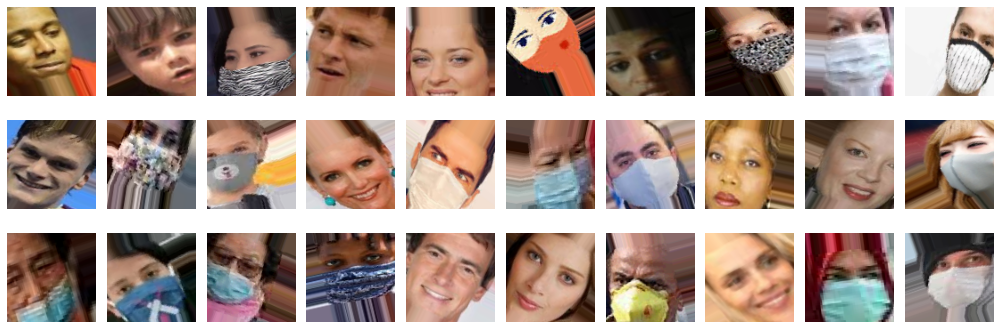

In [55]:
#tampilkan Data Generator
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
for i in range(30):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

# Modelling

In [48]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [56]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()
model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(Dropout(0.25))


model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())


# Fully Connected Layer
model.add(Dense(1024, activation='elu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))

model.add(Dense(1024, activation='elu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
average_pooling2d_28 (Averag (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
dropout_35 (Dropout)         (None, 50, 50, 128)       0         
_________________________________________________________________
average_pooling2d_29 (Averag (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 25, 25, 256)       295168    
_________________________________________________________________
dropout_36 (Dropout)         (None, 25, 25, 256)     

In [57]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.001, decay=0.001/32),
              loss='categorical_crossentropy',
              metrics='acc')

In [58]:
H = model.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data = validation_generator)

Epoch 1/100
10/10 [==============================] - 35s 3s/step - loss: 1.0311 - acc: 0.6476 - val_loss: 0.6835 - val_acc: 0.5888
Epoch 2/100
10/10 [==============================] - 29s 3s/step - loss: 0.7048 - acc: 0.7981 - val_loss: 0.6810 - val_acc: 0.5650
Epoch 3/100
10/10 [==============================] - 30s 3s/step - loss: 0.8073 - acc: 0.7067 - val_loss: 0.6800 - val_acc: 0.5725
Epoch 4/100
10/10 [==============================] - 30s 3s/step - loss: 0.9112 - acc: 0.6989 - val_loss: 0.6783 - val_acc: 0.5675
Epoch 5/100
10/10 [==============================] - 30s 3s/step - loss: 0.5846 - acc: 0.7543 - val_loss: 0.6753 - val_acc: 0.6125
Epoch 6/100
10/10 [==============================] - 30s 3s/step - loss: 0.7262 - acc: 0.7190 - val_loss: 0.6726 - val_acc: 0.7675
Epoch 7/100
10/10 [==============================] - 29s 3s/step - loss: 0.7793 - acc: 0.7409 - val_loss: 0.6724 - val_acc: 0.7450
Epoch 8/100
10/10 [==============================] - 30s 3s/step - loss: 0.4726 - a

10/10 [==============================] - 30s 3s/step - loss: 0.6633 - acc: 0.7854 - val_loss: 0.4672 - val_acc: 0.8112
Epoch 64/100
10/10 [==============================] - 29s 3s/step - loss: 0.6381 - acc: 0.7447 - val_loss: 0.6015 - val_acc: 0.7163
Epoch 65/100
10/10 [==============================] - 29s 3s/step - loss: 0.6174 - acc: 0.7467 - val_loss: 0.4568 - val_acc: 0.8075
Epoch 66/100
10/10 [==============================] - 28s 3s/step - loss: 0.6680 - acc: 0.7528 - val_loss: 0.5265 - val_acc: 0.7800
Epoch 67/100
10/10 [==============================] - 30s 3s/step - loss: 0.5324 - acc: 0.7873 - val_loss: 0.4222 - val_acc: 0.8213
Epoch 68/100
10/10 [==============================] - 29s 3s/step - loss: 0.5974 - acc: 0.7495 - val_loss: 0.6569 - val_acc: 0.7100
Epoch 69/100
10/10 [==============================] - 30s 3s/step - loss: 0.5323 - acc: 0.7488 - val_loss: 0.9790 - val_acc: 0.6300
Epoch 70/100
10/10 [==============================] - 30s 3s/step - loss: 0.5561 - acc: 0

# Result

In [59]:
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/Model.h5')